## Importok

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs, make_circles,fetch_20newsgroups,make_classification

from sklearn.pipeline import make_pipeline

from sklearn import *
from sklearn.model_selection import *

from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay,silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier

## Spotify data betöltése

In [3]:
#https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/
spotify = pd.read_csv('spotify_songs.csv')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,NaN,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,NaN,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,NaN,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Null értékek

In [4]:
spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        5
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
spotify['mode'].fillna(spotify['mode'].median(),inplace=True)

In [6]:
spotify.dropna(inplace=True)

## Binelés
A 'track_popularity' oszlopot alakítsuk át kategória oszlopra. 3 kategória legyen az értékek alapján: 'Unalmas', 'Hallgatható', 'Trendi'

In [7]:
my_labels = ['Unalmas', 'Hallgatható', 'Trendi']
spotify['track_popularity']= pd.qcut(spotify['track_popularity'], q=3, labels=my_labels)

In [8]:
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,Trendi,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,Trendi,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,Trendi,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,Trendi,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,Trendi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Plotolás
Készíts histogramot a track_popularity oszlopból!
Készíts scatter plotot a 'track_popularity' és 'duration_ms' oszlopokból!
Készíts bar plotot a "playlist_genre"-re csoportosítva és a következő adatokat jelenítsd meg:
'playlist_genre','danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'

(array([10426.,     0.,     0.,     0.,     0., 11348.,     0.,     0.,
            0., 11054.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

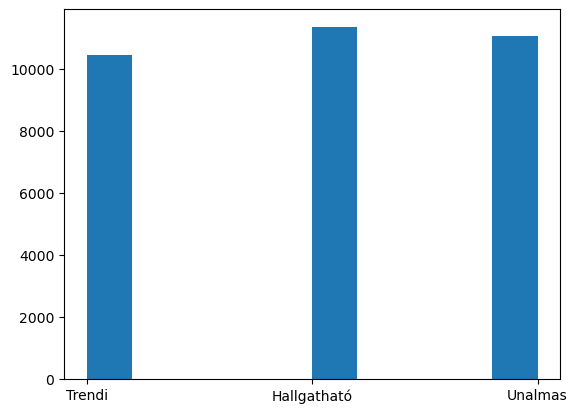

In [14]:
plt.hist(spotify['track_popularity'])

In [ ]:
plt.scatter(spotify['track_popularity'], spotify['duration_ms'])

In [ ]:
features = ['playlist_genre','danceability', 'energy',
     'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
df_group = spotify[features].groupby(["playlist_genre"]).mean()
df_group.plot(kind='bar',figsize=(10,5))

## Kategória oszlop készítése
A 'track_popularity' oszopból készítsünk új oszlopokat 'pop' prefixszel!
Konkatenáld össze az új oszlookat az eredeti adathalmazzal!
Dobd el a 'track_popularity' és 'track_id' oszlopokat!

In [ ]:
cols = pd.get_dummies(spotify['track_popularity'], prefix='pop')
df = pd.concat([spotify, cols], axis=1)
df.drop(['track_popularity', 'track_id'], axis=1, inplace=True)
df.head()

In [ ]:
df.columns

## Naive Bayes
Készíts egy Naive Bayes osztályozót, amely a 'playlist_genre'-t akarja predikálni a 'track_name' alapján!
A szöveg vektorizálásához használd a TfidfVectorizert!
Tanításhoz- ellenőrzéshez 80-20 arányban szeparáld az adatahalmazt!
Az eredményt egy confusion_matrix-on jelenítsd meg!

In [ ]:
featuresNB = 'track_name'
label = 'playlist_genre'
feat_data = df[featuresNB].copy()
label_data = df[label].copy()


print(feat_data.shape[0])
print(label_data.shape[0])

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

print(y_test.value_counts())

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
predicted_categories = model.predict(X_test)

In [ ]:
mat = confusion_matrix(y_test, predicted_categories)
labs = list(label_data.unique())
labs.sort()
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=labs)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)

## Klaszterezés
Készíts egy K-means klaszterezést a 'liveness', 'acousticness' paraméterekre és a K legyen 3!
Az eredményt egy scatter ploton jelenítsd meg!

In [ ]:
df_c = df[['liveness', 'acousticness']]
cl = KMeans(n_clusters=3, init='random', n_init=10, max_iter=200)
cl.fit(df_c)
clusters = cl.predict(df_c)

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('liveness')
plt.ylabel('acousticness')
plt.scatter(df['liveness'], df['acousticness'], s=50, c=clusters, alpha=0.7)

## Osztályozás
Készíts egy DecisionTree oszályozást a 'playlist_genre'-re a következő feature-ök felhasználásával:
'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'pop_Unalmas','pop_Hallgatható', 'pop_Trendi'
A tanítás-teszt aránya legyen 80-20
Az eredményt cross_val_score átlagával add meg!
Készíts AdaBoost osztályozót ugyanerre a döntési fára és nézd meg hogy jobb eredményt ad-e!

In [ ]:
features = ['danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'pop_Unalmas',
       'pop_Hallgatható', 'pop_Trendi']

label = 'playlist_genre'
feat_data = df[features].copy()
label_data = df[label].copy()

print(df[label].unique())

print(feat_data.shape[0])
print(label_data.shape[0])

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)


scores = cross_val_score(clf, X_train, y_train, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(estimator=dt, n_estimators=5, random_state=0)
results = model_selection.cross_val_score(clf, X_train, y_train, cv=10)
print(results.mean())
print(results.std())